# Import required Libraries

In [69]:
# Necessary libraries such as pandas and numpy are imported for data handling and numerical processing.
import pandas as pd
import numpy as np

### Import dataset

In [70]:
# The dataset is loaded using pd.read_csv, and the first 10 rows are inspected to understand the data structure. 

df=pd.read_csv('churn.csv')
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
5,AK,36,408,No,Yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,False
6,MI,65,415,No,No,0,211.3,120,35.92,162.6,122,13.82,134.7,118,6.06,13.2,5,3.56,3,False
7,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
8,VA,10,408,No,No,0,186.1,112,31.64,190.2,66,16.17,282.8,57,12.73,11.4,6,3.08,2,False
9,WI,68,415,No,No,0,148.8,70,25.30,246.5,164,20.95,129.8,103,5.84,12.1,3,3.27,3,False


In [42]:
#The dataset's structure is further analyzed using df.info().
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

### Finidng the number of rows and columns

In [43]:
#The number of rows and columns is determined with df.shape.

df.shape

(667, 20)

### Check for missing values

In [44]:
# A check for missing values is conducted using df.isnull().values.any() to ensure data integrity.

missing_values = df.isnull().values.any()
missing_values

False

### Data Preprocessing

In [72]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import warnings
# warnings.filterwarnings("ignore")

In [75]:
# apply LabelEncoder for categorical variables
'''Label encoding is applied to categorical features like "International plan," "Voice mail plan," and "Churn" 
to convert them into numerical values, making them suitable for model training. 
The transformed data is inspected to ensure proper encoding.'''

df['International plan']=le.fit_transform(df['International plan'])
df['Voice mail plan']=le.fit_transform(df['Voice mail plan'])
df['Churn']=le.fit_transform(df['Churn'])

In [76]:
#chcek for transformed data
df[['International plan','Voice mail plan','Churn']].head(10)

,International plan,Voice mail plan,Churn
0,0,0,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,0,0
5,0,1,0
6,0,0,0
7,0,0,1
8,0,0,0
9,0,0,0


In [77]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
662,WI,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0
663,AL,106,408,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,0
664,VT,60,415,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,0
665,WV,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0
666,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [78]:
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0
5,AK,36,408,0,1,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,0
6,MI,65,415,0,0,0,211.3,120,35.92,162.6,122,13.82,134.7,118,6.06,13.2,5,3.56,3,0
7,ID,119,415,0,0,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,1
8,VA,10,408,0,0,0,186.1,112,31.64,190.2,66,16.17,282.8,57,12.73,11.4,6,3.08,2,0
9,WI,68,415,0,0,0,148.8,70,25.30,246.5,164,20.95,129.8,103,5.84,12.1,3,3.27,3,0


### Data Visualization 

<Axes: xlabel='Churn', ylabel='Total day minutes'>

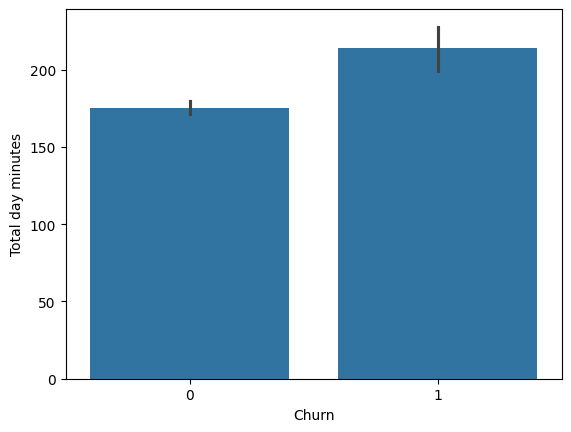

In [79]:

#A bar plot is created using seaborn to visualize the relationship between "Churn" and "Total day minutes."

import seaborn as sns
sns.barplot(x="Churn",y="Total day minutes",data=df)

In [117]:
#divide data into x and y variables
X=df.drop(['Churn','Area code','State'],axis=1)

y=df['Churn']
X.shape,y.shape
X

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,65,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
2,161,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
3,111,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2
4,49,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2
663,106,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1
664,60,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3
665,159,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1


In [118]:
y

0      0
1      1
2      1
3      0
4      0
      ..
662    0
663    0
664    0
665    0
666    0
Name: Churn, Length: 667, dtype: int64

### split data into trainning and testing

In [119]:
#The dataset is split into training and testing sets using train_test_split.
from sklearn.model_selection import train_test_split, GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## select model ~ Logistic Regression

In [120]:
''' Logistic Regression is selected as the first model, and it is trained on the training data. Predictions are made for both
the training and testing sets, and the accuracy of the model is evaluated using accuracy_score.'''

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [121]:
lr.fit(X_train,y_train)

LogisticRegression()

In [122]:
y_pred_train=lr.predict(X_train)
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [123]:
y_pred_test=lr.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [124]:
predicted = pd.DataFrame(np.c_[y_test,y_pred_test], columns = ["Original","Predicted"])
predicted

,Original,Predicted
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
196,0,0
197,0,0
198,0,0
199,0,0


### check accuracy

In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [88]:
acc_test=accuracy_score(y_test,y_pred_test)
acc_test

0.845771144278607

## Select model ~ Decision Tree Classifier

In [89]:
'''A Decision Tree Classifier is tested next by training it on the same dataset, 
and the accuracy is calculated in the same way.'''
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [90]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [91]:
y_dt_pred_test=dt.predict(X_test)

In [92]:
acc_test=accuracy_score(y_test,y_dt_pred_test)
acc_test

0.8955223880597015

## Select model ~ KNN

In [93]:
'''The K-Nearest Neighbors (KNN) algorithm is explored. Different values for k are tested,
and the error rate for each k is plotted using the Elbow Method to identify the optimal value of k. 
The model is trained with this optimal k, and its accuracy is evaluated.
'''
from sklearn.neighbors import KNeighborsClassifier as KNN
import matplotlib.pyplot as plt

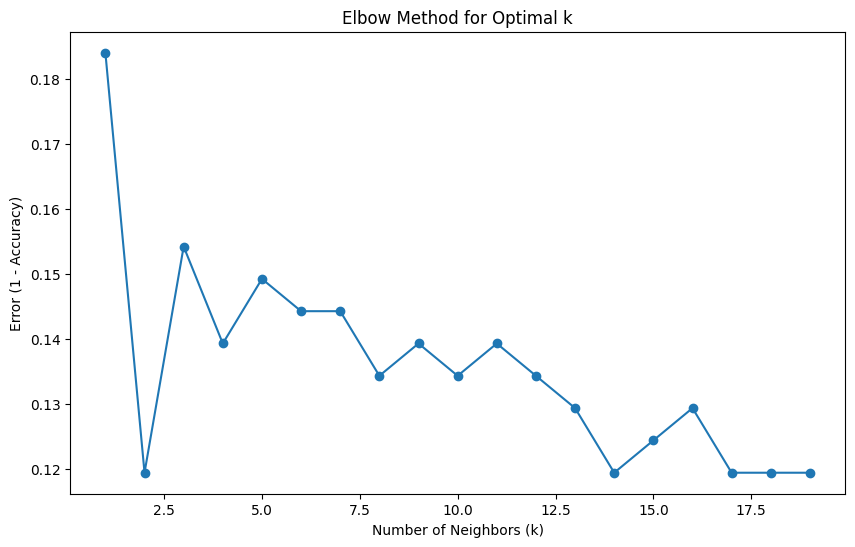

In [94]:
k_values = range(1, 20) 
errors = []

for k in k_values:
    # Initialize and train KNN Classifier
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    error = 1 - accuracy  # Error is 1 - accuracy
    errors.append(error)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error (1 - Accuracy)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [95]:
clf = KNN(n_neighbors =9) # finding K-value by elbow method

# Fitting the model
clf.fit(X_train, y_train)

# Predicting over the Train Set and calculating accuracy score
test_predict = clf.predict(X_test)
k_2 = accuracy_score(test_predict, y_test)
k_2

0.8706467661691543

## Hyperparameter Tuning

In [96]:
'''Hyperparameter tuning is performed using GridSearchCV to find the best parameters for KNN. 
The best model is then evaluated by generating a confusion matrix and classification report for the final predictions.'''

param_grid = {
    'n_neighbors': [3,5,7,9,11,13,15,17]
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=13),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]})

In [97]:
best_rf = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

y_pred_best_rf = best_rf.predict(X_test)
print("Best Random Forest Results:")
print(confusion_matrix(y_test, test_predict))
print(classification_report(y_test, test_predict))

Best parameters found:  {'n_neighbors': 7}
Best Random Forest Results:
[[167   3]
 [ 23   8]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       170
           1       0.73      0.26      0.38        31

    accuracy                           0.87       201
   macro avg       0.80      0.62      0.65       201
weighted avg       0.86      0.87      0.84       201

